In [1]:
import pandas as pd
import numpy as np
import openai
import json
from tqdm import tqdm
import ast
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
# import math
# import PyPDF2
import os
import re
import google.generativeai as genai
import signal
import shutil

In [2]:
genai.configure(api_key="your gemini api key")  # Replace with your Gemini API key

In [3]:
# configure which version of Gemini to use
model = genai.GenerativeModel('gemini-2.5-flash')

In [4]:
question = """
You are given a single JSON dictionary that represents metadata extracted from a study about potential-induced degradation (PID) in photovoltaic modules.

Your task is to extract and return a new JSON dictionary with the following keys:

- "filename": [The filename will be added separately — you do not need to guess or fill it in.]
- "year": [Use the value from the "year" field in the input. If missing, return "not reported".]
- "module technology": [Use the value from the "module technology" field in the input. If missing, return "not reported".]
- "voltage bias": ["positive (+)", "negative (-)", "both (+ and -)", or "none", based on signs or keywords in the input. Choose “positive (+)” if the value starts with "+" or includes the word "positive". Same logic for negative. Choose "both (+ and -)" if both appear. Choose "none" if missing.]
- "temperature": ["room (25 C)", "elevated (>25C)", "lowered (<25C)", or "not reported", based on temperature values or keywords like "ambient".]
- "doping": [Use the value from the "doping" field in the input. If missing, return "not reported".]
- "PID type studied": [Use the value from the "PID type studied" field in the input. If missing, return "not reported". Group entries of "Na-penetration-type PID" as "PID-s". Group "not specified" as "not reported".]
- "simplified mechanism chain": [Flatten the "degradation mechanism chain" into a single string joined by " -> ". Steps that occur simultaneously should be listed together in square brackets, separated by commas. For example, if the chain reports negative voltage bias and heat as stress factors that lead to Na+ ion migration, format this as “[negative voltage bias, heat] -> [Na+ ion migration from glass]”, and then continue with the rest of the reported chain. Use this same process for electrical effects that happen simultaneously. For example, “[Decreased fill factor, Decreased open-circuit voltage]”. Keep details about details within the crystals, chemical species that form, and the electrical effects occurring in the module.]
"chain match": [response should be "shunting", “corrosion”, AND/OR “polarization”. Choose the response based on which of the following patterns the simplified mechanism chain reflects. You may enter more than one option. ALL chains begin with [voltage bias] -> [ion migration] and END with [reduced power output]. Choose the match based on which of the following steps in the middle best reflect the simplified mechanism chain. The patterns are as follows: 
Shunting: [ion accumulation at interface] -> [conductive pathway (shunt) formation] -> [increased leakage current]
Corrosion: [increased leakage current] -> [corrosion of cell, frame, coating, or other components]
Polarization: [charge accumulation in dielectric layers] -> [decreased open-circuit voltage (Voc), reduced short-circuit current density (Jsc)]
Note that corrosion frequently comes after shunting due to the connecting step of “increased leakage current”. 
Remember that the chains do not have to exactly match - you’re looking for patterns, not replicas. If the chain truly does not match any of these patterns, return “no match”.]

Requirements:
- Only return a **single valid JSON dictionary**.
- Do **not** include explanations, markdown, Python code, or any formatting — just the JSON dictionary itself.

"""



In [5]:
question2 = """
The JSON files provided contain data extracted from studies about potential-induced degradation (PID) in photovoltaic modules. This information is organized in dictionaries. 
The entries for "degradation mechanism chain" show how the degradation occurs, listed as a series of steps specific to each study. This tends to be in the order of stress factors (such as voltage bias, heat, or humidity) -> chemical processes (such as ion migration) -> electrical effects (such as decreased shunt resistance, increased leakage current, etc.) -> decreased power output.

Summarize the overall trends that you see across the degradation mechanism chains provided. Include details about which steps appear the most in the general categories of degradation steps (from stress factors to decreased power output) and anything you find unusual. 
Additionally, note when the steps may be parts of feedback loops. This information is needed to map out how the steps align with one another, whether in parallel or in sequence with each other. 
Provide a list of major pathways. 
"""

load JSON files (output dictionaries from Read_PDFs) so that Gemini can read and summarize

In [ ]:
folder_path = "json_allPID" # replace with your folder containing JSON files
json_files = [f for f in os.listdir(folder_path) if f.endswith(".json")]
for file_name in json_files:
    with open(os.path.join(folder_path, file_name), "r") as f:
        content = json.load(f)

In [ ]:
import os
import json
import google.generativeai as genai

# === CONFIGURATION ===
folder_path = "json_allPID"

# === LOOP THROUGH FILES ===
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        file_path = os.path.join(folder_path, filename)

        # Load JSON data
        try:
            with open(file_path, "r") as f:
                data = json.load(f)
        except Exception as e:
            print(f"Failed to load {filename}: {e}")
            continue

        # Convert to string (pretty format)
        json_string = json.dumps(data, indent=2)

        # Send to Gemini
        prompt = f"""
       question2
        """
        try:
            response = model.generate_content(prompt)
            print(f"\n--- Summary for {filename} ---\n")
            print(response.text)
            print("\n" + "="*60 + "\n")
        except Exception as e:
            print(f"Gemini failed on {filename}: {e}")



--- Summary for gemini_PID_2018_2-s20-85042545414.json ---

It seems you've provided "question2" as a prompt. To help you effectively, I need a little more information!

Could you please clarify:

1.  **What is the full text of "question2"?** (e.g., "What are the three main types of rocks?")
2.  **What do you want me to do with "question2"?**
    *   Do you want me to **answer** it?
    *   Do you want me to **generate** a question 2 about a specific topic?
    *   Are you asking about the **meaning** of "question2" in a particular context?
    *   Is it a placeholder for something else?
3.  **What is the context of "question2"?** (e.g., Is it from a test, homework, a discussion, a specific subject like history or programming?)

Once you provide more details, I can assist you!



--- Summary for gemini_PID-2023-2-s20-85182800874.json ---

Okay, you've stated "question2".

To help you, could you please clarify what you mean by that?

Are you looking for me to:

1.  **Provide a second q

KeyboardInterrupt: 

In [7]:
response = model.generate_content(question2)
print(response.text)

The provided degradation mechanism chains offer a fascinating insight into the complex processes of Potential-Induced Degradation (PID) in photovoltaic modules. Across the various studies, clear trends emerge, highlighting common stressors, chemical reactions, electrical consequences, and the ultimate impact on power output.

---

### Overall Trends in Degradation Mechanism Chains

The degradation mechanism chains consistently follow a sequence, beginning with external stress factors, leading to internal chemical or physical changes, which then manifest as measurable electrical effects, and finally result in a decrease in the module's power output.

**1. Stress Factors (Initiators):**
*   **Most Common:**
    *   **Voltage Bias (especially high negative bias):** This is by far the most prevalent initial stressor, indicating its central role in driving PID. Phrases like "high negative voltage bias," "high voltage," or simply "negative bias" appear frequently.
    *   **Temperature:** Of

In [40]:
# INPUT and OUTPUT folders
json_folder = "json_allPID"
output_folder = "Mech_Chain_Analysis3"
os.makedirs(output_folder, exist_ok=True)

# Loop through JSON files
for filename in tqdm(os.listdir(json_folder), desc="Processing JSONs"):
    if not filename.endswith(".json"):
        continue

    file_path = os.path.join(json_folder, filename)

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            json_data = json.load(f)

        # Handle multiple dictionaries per file
        entries = json_data if isinstance(json_data, list) else [json_data]

        for i, entry in enumerate(entries):
            json_text = json.dumps(entry, indent=2)

            result = model.generate_content(
                [question, "\n\n", json_text],
                generation_config={"temperature": 0}
            )

            res_text = result.text.strip()

            # Attempt 1: extract from ```json ... ```
            match = re.search(r"```json\s*(\{[\s\S]+?\})\s*```", res_text)

            if match:
                cleaned_text = match.group(1)
                output_data = json.loads(cleaned_text)
            else:
                # Attempt 2: loose capture
                match_loose = re.search(r"(\{[\s\S]+?\})", res_text)
                if match_loose:
                    try:
                        output_data = json.loads(match_loose.group(1))
                    except json.JSONDecodeError:
                        output_data = {"raw_response": res_text}
                else:
                    output_data = {"raw_response": res_text}

            # Append filename manually to result if valid
            expected_keys = {
                "year", "module technology", "voltage bias",
                "temperature", "doping", "PID type studied",
                "simplified mechanism chain", "chain match"
            }

            if isinstance(output_data, dict) and expected_keys & output_data.keys():
                output_data["filename"] = filename
                final_output = output_data
            else:
                final_output = {"raw_response": res_text}

            # Save output to individual file
            base_name = filename.replace(".json", "")
            output_path = os.path.join(output_folder, f"{base_name}_entry{i+1}.json")
            with open(output_path, "w", encoding="utf-8") as f:
                json.dump(final_output, f, indent=4)

    except Exception as e:
        print(f"{filename} failed due to: {e}")
        continue



Processing JSONs: 100%|██████████| 59/59 [22:54<00:00, 23.30s/it]


# graph information from JSON comparisons 

In [2]:
# set colors for graphs
colors = ['#87CEEB', "#FF9A9A", "#FFEC99", "#E7A5FF", "#B2F7BE", "#95B7FF", "#966fdf", "#ffb3e6", "#ffcc99", "#c2f0c2", "#d9d9d9", "#ff6666", "#66b3ff", "#99ff99", "#ffcc00"]
colors_mono = ['#87CEEB', "#B5E9FD", "#5A9BB5", "#3A758D", "#B5FBEE", "#67E4CF", "#58D7D9", "#389F96",]
colors_mono2 = ["#FFc7d3", "#eaa4b3", "#d28394", "#b36375", "#FFc7d3", "#a8475c", "#672937", "#7e293c",]
colors_mono3 = ["#FFE2D4", "#E1B18F", "#CE8F5C", "#BD7439", "#F0D373", "#DBB21D", "#EEBF00", "#E1B04F",]
colors_mono4 = ["#D4FFD5", "#91CE91", "#46B295", "#9AEDDF", "#69BEAB", "#0A6F52", "#3AA27E", "#2B8A6F",]

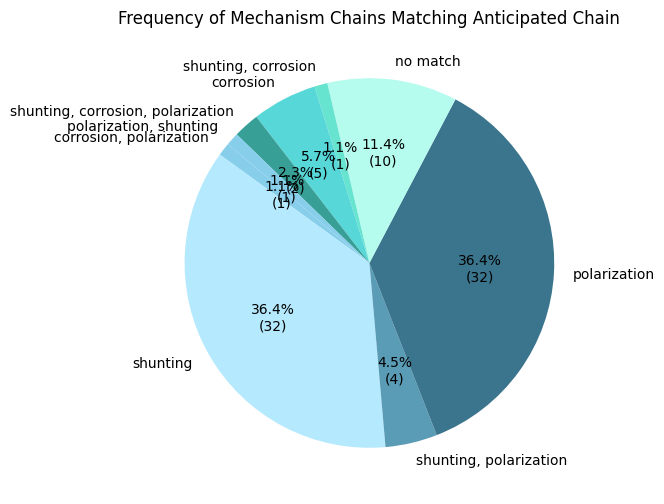

In [5]:
chain_match_counts = {}

folder = "Mech_Chain_Analysis3"
for fname in os.listdir(folder):
    if fname.endswith(".json"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            data = json.load(f)
            # Handle both list of dicts and single dict
            if isinstance(data, list):
                for entry in data:
                    val = entry.get("chain match")
                    if val:
                        # Convert list to string for dict key
                        key = ', '.join(val) if isinstance(val, list) else str(val)
                        chain_match_counts[key] = chain_match_counts.get(key, 0) + 1
            elif isinstance(data, dict):
                val = data.get("chain match")
                if val:
                    key = ', '.join(val) if isinstance(val, list) else str(val)
                    chain_match_counts[key] = chain_match_counts.get(key, 0) + 1
def autopct_with_counts(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return inner_autopct

values = list(chain_match_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=list(chain_match_counts.keys()),
    colors=colors_mono,
    autopct=autopct_with_counts(values),
    startangle=140
)
plt.title('Frequency of Mechanism Chains Matching Anticipated Chain')
plt.show()


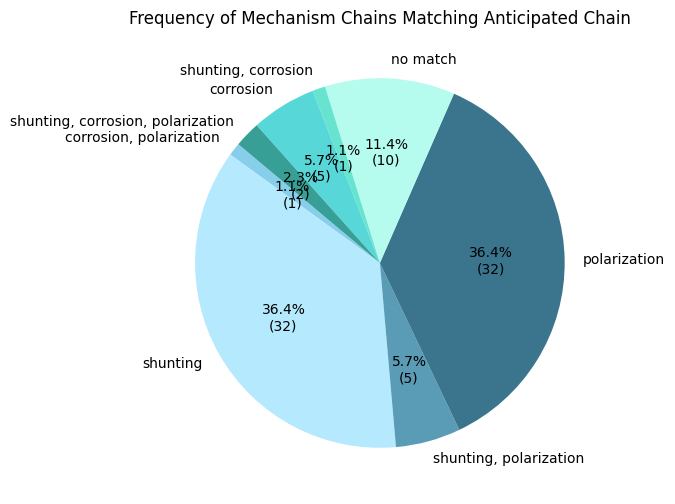

In [33]:
# Create a new dictionary with "polarization, shunting" mapped to "shunting, polarization"
pie_counts = {}
for k, v in chain_match_counts.items():
    if k == "polarization, shunting":
        pie_counts["shunting, polarization"] = pie_counts.get("shunting, polarization", 0) + v
    else:
        pie_counts[k] = pie_counts.get(k, 0) + v

values = list(pie_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=list(pie_counts.keys()),
    colors=colors_mono,
    autopct=autopct_with_counts(values),
    startangle=140
)
plt.title('Frequency of Mechanism Chains Matching Anticipated Chain')
plt.show()

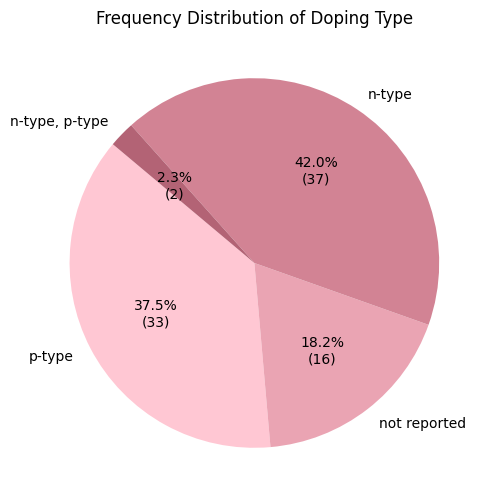

In [34]:
doping_counts = {}

folder = "Mech_Chain_Analysis3"
for fname in os.listdir(folder):
    if fname.endswith(".json"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            data = json.load(f)
            # Handle both list of dicts and single dict
            if isinstance(data, list):
                for entry in data:
                    val = entry.get("doping")
                    if val:
                        # Convert lists to a comma-separated string for dictionary key
                        key = ', '.join(val) if isinstance(val, list) else str(val)
                        doping_counts[key] = doping_counts.get(key, 0) + 1
            elif isinstance(data, dict):
                val = data.get("doping")
                if val:
                    # Convert lists to a comma-separated string for dictionary key
                    key = ', '.join(val) if isinstance(val, list) else str(val)
                    doping_counts[key] = doping_counts.get(key, 0) + 1


def autopct_with_counts(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return inner_autopct

values = list(doping_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=list(doping_counts.keys()),
    colors=colors_mono2,
    autopct=autopct_with_counts(values),
    startangle=140
)
plt.title('Frequency Distribution of Doping Type')
plt.show()


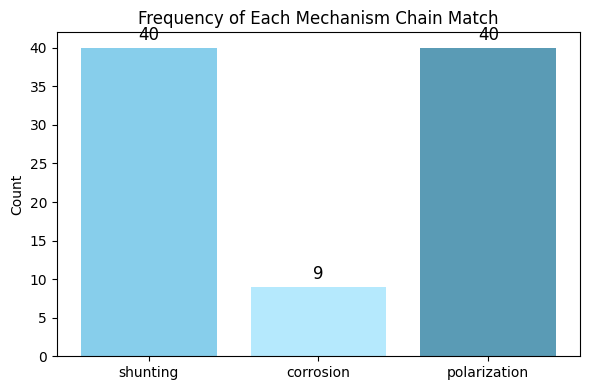

In [35]:
# Count frequency for each individual chain match type
chain_types = ["shunting", "corrosion", "polarization"]
individual_counts = {ct: 0 for ct in chain_types}

folder = "Mech_Chain_Analysis3"
for fname in os.listdir(folder):
    if fname.endswith(".json"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            data = json.load(f)
            entries = data if isinstance(data, list) else [data]
            for entry in entries:
                cm = entry.get("chain match")
                if cm:
                    if isinstance(cm, list):
                        cm_list = cm
                    else:
                        cm_list = [c.strip() for c in str(cm).split(",")]
                    for ct in chain_types:
                        if ct in cm_list:
                            individual_counts[ct] += 1

plt.figure(figsize=(6, 4))
plt.bar(individual_counts.keys(), individual_counts.values(), color=colors_mono[:3])
plt.ylabel("Count")
plt.title('Frequency of Each Mechanism Chain Match')
for i, v in enumerate(individual_counts.values()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

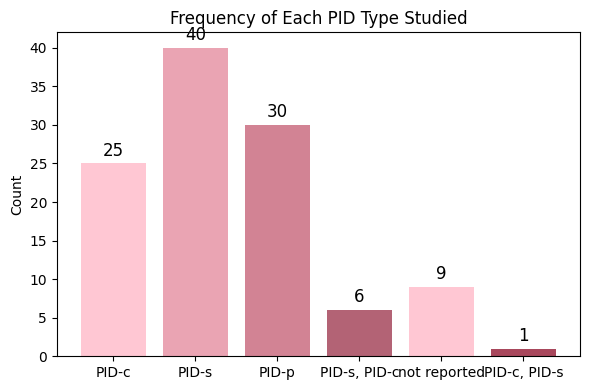

In [36]:
# Count frequency for each PID type studied across all files
pid_type_counts = {}

folder = "Mech_Chain_Analysis3"
for fname in os.listdir(folder):
    if fname.endswith(".json"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            data = json.load(f)
            entries = data if isinstance(data, list) else [data]
            for entry in entries:
                pid_types = entry.get("PID type studied")
                if pid_types:
                    if isinstance(pid_types, list):
                        for pid in pid_types:
                            pid_type_counts[pid] = pid_type_counts.get(pid, 0) + 1
                    else:
                        pid_type_counts[pid_types] = pid_type_counts.get(pid_types, 0) + 1

plt.figure(figsize=(6, 4))
plt.bar(pid_type_counts.keys(), pid_type_counts.values(), color=colors_mono2[:len(pid_type_counts)])
plt.ylabel("Count")
plt.title('Frequency of Each PID Type Studied')
for i, v in enumerate(pid_type_counts.values()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

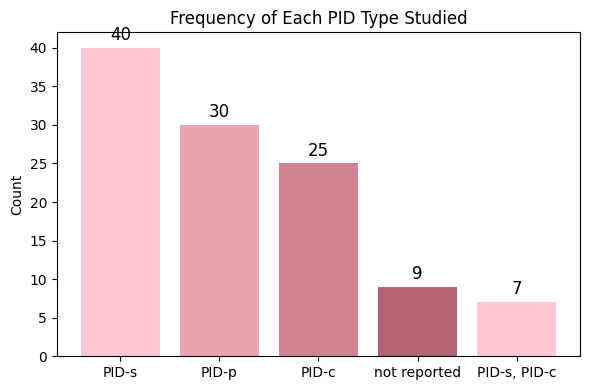

In [37]:
# Combine "PID-c, PID-s" and "PID-s, PID-c" into "PID-s, PID-c" and sum their counts
pid_type_counts_combined = pid_type_counts.copy()
pid_type_counts_combined["PID-s, PID-c"] = (
    pid_type_counts_combined.get("PID-s, PID-c", 0)
    + pid_type_counts_combined.get("PID-c, PID-s", 0)
)
if "PID-c, PID-s" in pid_type_counts_combined:
    del pid_type_counts_combined["PID-c, PID-s"]

# Sort by most frequent
sorted_items = sorted(pid_type_counts_combined.items(), key=lambda x: x[1], reverse=True)
labels = [k for k, v in sorted_items]
counts = [v for k, v in sorted_items]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=colors_mono2[:len(labels)])
plt.ylabel("Count")
plt.title('Frequency of Each PID Type Studied')
for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

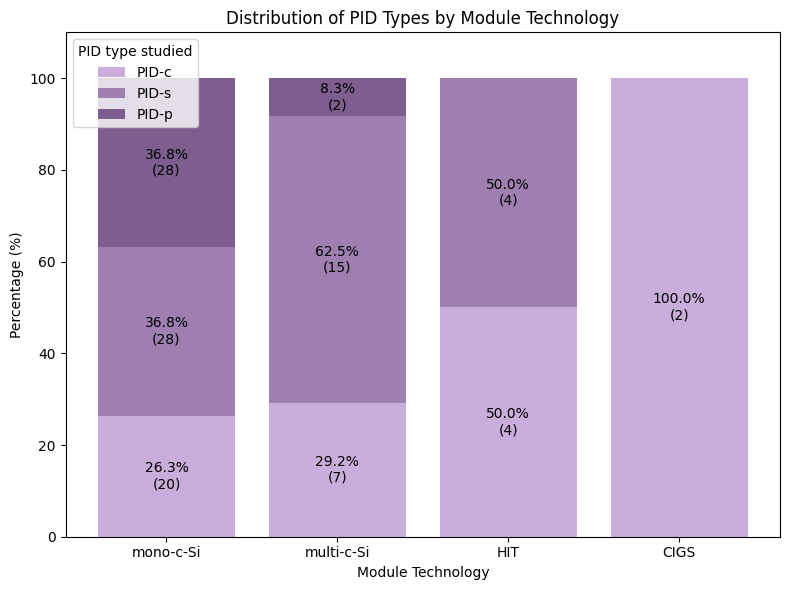

In [38]:
import os
import json
import matplotlib.pyplot as plt

# Aggregate counts of PID types for each module technology
pid_types_of_interest = ["PID-c", "PID-s", "PID-p"]
module_pid_counts = {}

folder = "Mech_Chain_Analysis3"
for fname in os.listdir(folder):
    if fname.endswith(".json"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            data = json.load(f)
            entries = data if isinstance(data, list) else [data]
            for entry in entries:
                tech = entry.get("module technology", "not reported")
                pid_types = entry.get("PID type studied", "not reported")
                if isinstance(pid_types, str):
                    pid_types = [pid.strip() for pid in pid_types.split(",")]
                tech_list = tech if isinstance(tech, list) else [tech]

                for t in tech_list:
                    # Grouping c-Si and n-type c-Si into mono-c-Si
                    if t in ["c-Si", "n-type c-Si"]:
                        t = "mono-c-Si"

                    if t not in module_pid_counts:
                        module_pid_counts[t] = {pid: 0 for pid in pid_types_of_interest}
                    for pid in pid_types:
                        if pid in pid_types_of_interest:
                            module_pid_counts[t][pid] += 1

# Prepare and sort data
unsorted_labels = [tech for tech in module_pid_counts if tech != "not reported"]
totals_per_tech = {tech: sum(module_pid_counts[tech][pid] for pid in pid_types_of_interest) for tech in unsorted_labels}
# Sort module technologies by total counts descending
sorted_labels = sorted(unsorted_labels, key=lambda x: totals_per_tech[x], reverse=True)

# Prepare data for plotting
pid_counts_per_tech = {pid: [module_pid_counts[tech][pid] for tech in sorted_labels] for pid in pid_types_of_interest}
totals_sorted = [totals_per_tech[tech] for tech in sorted_labels]

# Calculate percentages
pid_perc_per_tech = {
    pid: [100 * count / total if total > 0 else 0 for count, total in zip(pid_counts_per_tech[pid], totals_sorted)]
    for pid in pid_types_of_interest
}

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bottom = [0] * len(sorted_labels)
colors_stack = ["#c9adda", '#9e7fb0', "#7d5e8e"]  # Colors for stacked bars

for idx, pid in enumerate(pid_types_of_interest):
    bars = ax.bar(
        sorted_labels,
        pid_perc_per_tech[pid],
        bottom=bottom,
        label=pid,
        color=colors_stack[idx]
    )
    for i, bar in enumerate(bars):
        perc = pid_perc_per_tech[pid][i]
        count = pid_counts_per_tech[pid][i]
        if perc > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bottom[i] + perc / 2,
                f'{perc:.1f}%\n({count})',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
    bottom = [b + p for b, p in zip(bottom, pid_perc_per_tech[pid])]

ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Module Technology')
ax.set_title('Distribution of PID Types by Module Technology')
ax.legend(title="PID type studied")

plt.ylim(0, 110)
plt.tight_layout()
plt.show()


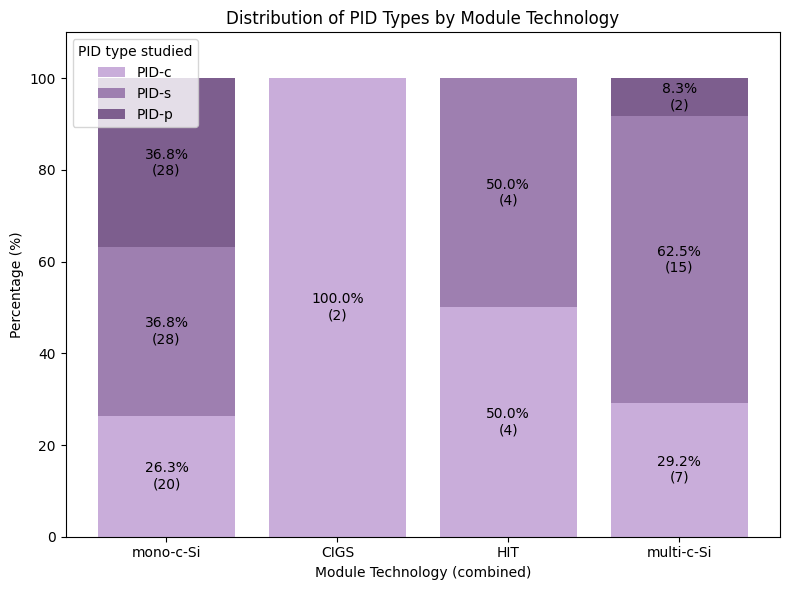

In [39]:
# Combine "n-type c-Si" and "c-Si" into "mono-c-Si" for module technology
combined_module_pid_counts = {}

for tech, pid_counts in module_pid_counts.items():
    if tech in ["n-type c-Si", "c-Si"]:
        combined_key = "mono-c-Si"
        if combined_key not in combined_module_pid_counts:
            combined_module_pid_counts[combined_key] = {pid: 0 for pid in pid_types_of_interest}
        for pid in pid_types_of_interest:
            combined_module_pid_counts[combined_key][pid] += pid_counts[pid]
    elif tech != "not reported":
        combined_module_pid_counts[tech] = pid_counts.copy()

# Prepare data for plotting
combined_labels = list(combined_module_pid_counts.keys())
combined_pid_counts = {pid: [combined_module_pid_counts[tech][pid] for tech in combined_labels] for pid in pid_types_of_interest}
combined_totals = [sum(combined_module_pid_counts[tech][pid] for pid in pid_types_of_interest) for tech in combined_labels]
combined_pid_perc = {pid: [100 * count / total if total > 0 else 0 for count, total in zip(combined_pid_counts[pid], combined_totals)] for pid in pid_types_of_interest}

fig, ax = plt.subplots(figsize=(8, 6))
bottom = [0] * len(combined_labels)
for idx, pid in enumerate(pid_types_of_interest):
    bars = ax.bar(
        combined_labels,
        combined_pid_perc[pid],
        bottom=bottom,
        label=pid,
        color=colors_stack[idx]
    )
    for i, bar in enumerate(bars):
        perc = combined_pid_perc[pid][i]
        count = combined_pid_counts[pid][i]
        if perc > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bottom[i] + perc / 2,
                f'{perc:.1f}%\n({count})',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
    bottom = [b + p for b, p in zip(bottom, combined_pid_perc[pid])]

ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Module Technology (combined)')
ax.set_title('Distribution of PID Types by Module Technology')
ax.legend(title="PID type studied")
plt.ylim(0, 110)
plt.tight_layout()
plt.show()

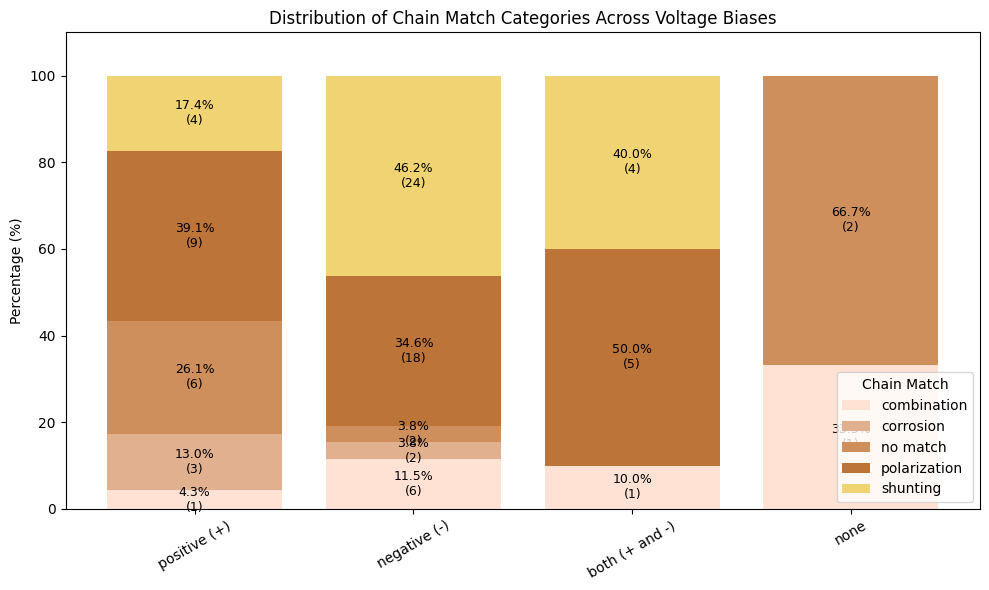

In [40]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Prepare data for plotting voltage bias vs chain match
voltage_bias_chain_counts = defaultdict(lambda: defaultdict(int))
all_chain_categories = set()

folder = "Mech_Chain_Analysis3"
for fname in os.listdir(folder):
    if fname.endswith(".json"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            data = json.load(f)
            entries = data if isinstance(data, list) else [data]
            for entry in entries:
                vb = entry.get("voltage bias", "not reported").lower()
                cm = entry.get("chain match", "not reported")

                # --- Normalize chain match category ---
                if isinstance(cm, list):
                    if len(cm) == 0:
                        cm = "not reported"
                    elif len(cm) == 1:
                        cm = cm[0]
                    else:
                        cm = "combination"
                elif not isinstance(cm, str):
                    cm = str(cm)

                voltage_bias_chain_counts[vb][cm] += 1
                all_chain_categories.add(cm)

# --- Clean up labels ---
chain_categories = sorted([c for c in all_chain_categories if c != "not reported"])

# Define custom order for voltage bias
custom_order = ["positive (+)", "negative (-)", "both (+ and -)", "none"]
extra_biases = sorted(set(voltage_bias_chain_counts.keys()) - set(custom_order) - {"not reported"})
voltage_labels = custom_order + extra_biases

# Calculate percentages for each category
category_percentages = {cat: [] for cat in chain_categories}
category_counts = {cat: [] for cat in chain_categories}
total_counts = []

for vb in voltage_labels:
    total = sum(voltage_bias_chain_counts[vb][cat] for cat in chain_categories)
    total_counts.append(total)
    for cat in chain_categories:
        count = voltage_bias_chain_counts[vb][cat]
        category_counts[cat].append(count)
        percent = 100 * count / total if total > 0 else 0
        category_percentages[cat].append(percent)

# Plotting stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = [0] * len(voltage_labels)

colors = plt.cm.Pastel1.colors  # Use distinct pastel colors
for i, cat in enumerate(chain_categories):
    perc = category_percentages[cat]
    bar = ax.bar(voltage_labels, perc, bottom=bottom, label=cat, color=colors_mono3[i % len(colors)])
    
    # Add text labels to each segment
    for j in range(len(voltage_labels)):
        if perc[j] > 0:
            ax.text(j, bottom[j] + perc[j]/2, f"{perc[j]:.1f}%\n({category_counts[cat][j]})",
                    ha="center", va="center", fontsize=9, color="black")
    
    bottom = [bottom[j] + perc[j] for j in range(len(voltage_labels))]

ax.set_ylabel('Percentage (%)')
ax.set_title('Distribution of Chain Match Categories Across Voltage Biases')
ax.legend(title="Chain Match")
plt.ylim(0, 110)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



In [41]:
simplified_mechanism_chains = []

folder = "Mech_Chain_Analysis3"
for fname in os.listdir(folder):
    if fname.endswith(".json"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            data = json.load(f)
            # Handle both list of dicts and single dict
            entries = data if isinstance(data, list) else [data]
            for entry in entries:
                chain = entry.get("simplified mechanism chain", "not reported")
                simplified_mechanism_chains.append(chain)

for i, chain in enumerate(simplified_mechanism_chains, 1):
    print(f"{i}: {chain}")

1: high positive voltage bias at rear glass surface (silicon surface at negative potential/cathodic conditions) -> migration of alkali metal ions (Na, K, Ca) towards Si/AlOx interface -> alkali ions overcompensate field effect passivation of AlOx layer -> lateral corrosive reaction of silicon surface beneath AlOx/SiNy passivation layer stack, forming circular-shaped holes and SiO2 layer -> volume expansion of generated SiO2 layer causes delamination/destruction of SiN/AlOx passivation layer -> corrosion-related defects pit into rear silicon bulk, leading to failure of passivation and increased recombination (micron-sized hole-shaped damages) -> [reduction in short-circuit current (Isc), reduction in open-circuit voltage (Voc)], leading to power loss
2: negative voltage bias -> sodium ion (Na+) migration from glass to cell -> accumulation of Na+ ions within cell across n+-p junction -> increase in shunt current (Ishp) -> formation of nonlinear and linear leakage paths -> [decrease in sh

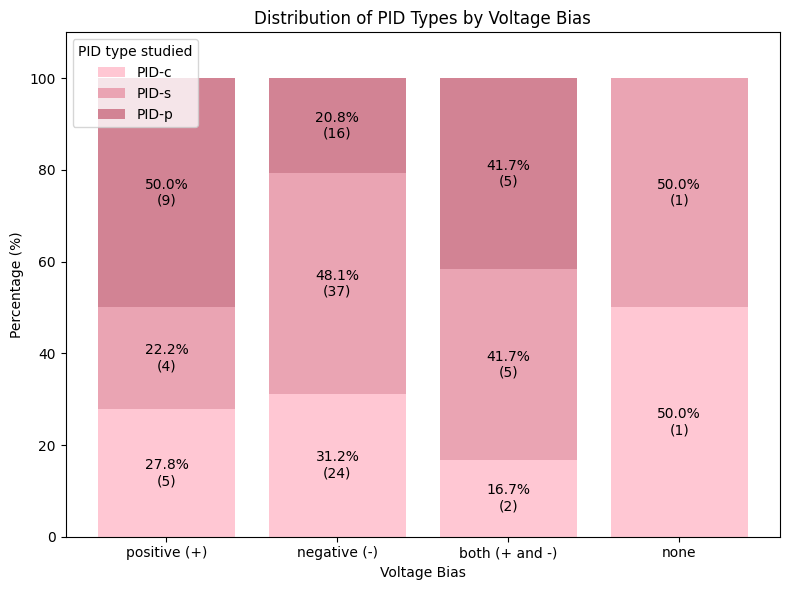

In [42]:
# Aggregate counts of PID types for each voltage bias
pid_types_of_interest = ["PID-c", "PID-s", "PID-p"]
voltage_pid_counts = {}

for fname in os.listdir(folder):
    if fname.endswith(".json"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            data = json.load(f)
            entries = data if isinstance(data, list) else [data]
            for entry in entries:
                vb = entry.get("voltage bias", "not reported")
                pid_types = entry.get("PID type studied", "not reported")
                if isinstance(pid_types, str):
                    pid_types = [pid.strip() for pid in pid_types.split(",")]
                if vb not in voltage_pid_counts:
                    voltage_pid_counts[vb] = {pid: 0 for pid in pid_types_of_interest}
                for pid in pid_types:
                    if pid in pid_types_of_interest:
                        voltage_pid_counts[vb][pid] += 1

# Prepare data for plotting
voltage_bias_labels = [vb for vb in voltage_pid_counts if vb != "not reported"]
pid_counts_per_vb = {pid: [voltage_pid_counts[vb][pid] for vb in voltage_bias_labels] for pid in pid_types_of_interest}
totals_per_vb = [sum(voltage_pid_counts[vb][pid] for pid in pid_types_of_interest) for vb in voltage_bias_labels]

# Calculate percentages
pid_perc_per_vb = {pid: [100 * count / total if total > 0 else 0 for count, total in zip(pid_counts_per_vb[pid], totals_per_vb)] for pid in pid_types_of_interest}

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bottom = [0] * len(voltage_bias_labels)
colors_stack = [colors_mono2[0], colors_mono2[1], colors_mono2[2]]

for idx, pid in enumerate(pid_types_of_interest):
    bars = ax.bar(
        voltage_bias_labels,
        pid_perc_per_vb[pid],
        bottom=bottom,
        label=pid,
        color=colors_stack[idx]
    )
    # Add labels inside each bar segment
    for i, bar in enumerate(bars):
        perc = pid_perc_per_vb[pid][i]
        count = pid_counts_per_vb[pid][i]
        if perc > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bottom[i] + perc / 2,
                f'{perc:.1f}%\n({count})',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
    bottom = [b + p for b, p in zip(bottom, pid_perc_per_vb[pid])]

ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Voltage Bias')
ax.set_title('Distribution of PID Types by Voltage Bias')
ax.legend(title="PID type studied")

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

# run Chi Square tests on different data groupings

Voltage bias & PID Type


In [64]:
# create contingency table
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "Mech_Chain_Analysis3"  # Folder with JSON files
category1 = "voltage bias"         # First category (e.g., Positive/Negative)
category2 = "PID type studied"     # Second category (e.g., PID-s, PID-c, etc.)

# === VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                # Handle files with a list of dicts or a single dict
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)
                    if val1 and val2:
                        if isinstance(val2, list):
                            for v in val2:
                                v_mapped = value_map.get(v, v)
                                contingency_dict[val1][v_mapped] += 1
                        else:
                            v_mapped = value_map.get(val2, val2)
                            contingency_dict[val1][v_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)



Contingency Table:
                PID-c  PID-s  PID-p  PID-s, PID-c  not reported  PID-c, PID-s
positive (+)        4      3      9             1             6             0
negative (-)       19     32     16             4             1             1
both (+ and -)      1      4      5             1             0             0
none                1      1      0             0             2             0


In [65]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")



Chi-Square Test Results:
Chi-square statistic = 34.584
Degrees of freedom = 15
p-value = 0.0028

Expected Frequencies:
                    PID-c      PID-s      PID-p  PID-s, PID-c  not reported  \
positive (+)     5.180180   8.288288   6.216216      1.243243      1.864865   
negative (-)    16.441441  26.306306  19.729730      3.945946      5.918919   
both (+ and -)   2.477477   3.963964   2.972973      0.594595      0.891892   
none             0.900901   1.441441   1.081081      0.216216      0.324324   

                PID-c, PID-s  
positive (+)        0.207207  
negative (-)        0.657658  
both (+ and -)      0.099099  
none                0.036036  


PID Type & Module Technology

In [66]:
# create contingency table
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "Mech_Chain_Analysis2"  # Folder with JSON files
category1 = "module technology"         # First category (e.g., Positive/Negative)
category2 = "PID type studied"     # Second category (e.g., PID-s, PID-c, etc.)

# === VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                # Handle files with a list of dicts or a single dict
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)
                    if val1 and val2:
                        # Handle val1 as list or str
                        val1_list = val1 if isinstance(val1, list) else [val1]
                        val2_list = val2 if isinstance(val2, list) else [val2]
                        for v1 in val1_list:
                            for v2 in val2_list:
                                v2_mapped = value_map.get(v2, v2)
                                contingency_dict[v1][v2_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)

Contingency Table:
              PID-c  PID-p  PID-s  PID-c, PID-s  not reported  \
mono-c-Si        12     21     16             1             6   
c-Si              1      3      9             0             0   
CIGS              2      0      0             0             0   
n-type c-Si       4      3      0             0             0   
HIT               4      0      4             0             2   
multi-c-Si        6      2     14             0             0   
not reported      0      0      1             0             1   

              PID-p, PID-c, Na-penetration-type PID  PID-s, PID-c  
mono-c-Si                                         1             0  
c-Si                                              0             1  
CIGS                                              0             0  
n-type c-Si                                       0             0  
HIT                                               0             0  
multi-c-Si                                        0 

In [67]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")


Chi-Square Test Results:
Chi-square statistic = 51.184
Degrees of freedom = 36
p-value = 0.0482

Expected Frequencies:
                  PID-c      PID-p      PID-s  PID-c, PID-s  not reported  \
mono-c-Si     14.500000  14.500000  22.000000      0.500000      4.500000   
c-Si           3.561404   3.561404   5.403509      0.122807      1.105263   
CIGS           0.508772   0.508772   0.771930      0.017544      0.157895   
n-type c-Si    1.780702   1.780702   2.701754      0.061404      0.552632   
HIT            2.543860   2.543860   3.859649      0.087719      0.789474   
multi-c-Si     5.596491   5.596491   8.491228      0.192982      1.736842   
not reported   0.508772   0.508772   0.771930      0.017544      0.157895   

              PID-p, PID-c, Na-penetration-type PID  PID-s, PID-c  
mono-c-Si                                  0.500000      0.500000  
c-Si                                       0.122807      0.122807  
CIGS                                       0.017544      0.

PID type & Temp

In [68]:
# create contingency table
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "Mech_Chain_Analysis2"  # Folder with JSON files
category1 = "temperature"         # First category (e.g., Positive/Negative)
category2 = "PID type studied"     # Second category (e.g., PID-s, PID-c, etc.)

# === VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                # Handle files with a list of dicts or a single dict
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)
                    if val1 and val2:
                        # Handle val1 as list or str
                        val1_list = val1 if isinstance(val1, list) else [val1]
                        val2_list = val2 if isinstance(val2, list) else [val2]
                        for v1 in val1_list:
                            for v2 in val2_list:
                                v2_mapped = value_map.get(v2, v2)
                                contingency_dict[v1][v2_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)

Contingency Table:
                 PID-c  PID-s  PID-p  PID-c, PID-s  not reported  \
elevated (>25C)     27     38     23             1             8   
room (25 C)          1      4      5             0             0   
not reported         0      1      1             0             1   

                 PID-p, PID-c, Na-penetration-type PID  PID-s, PID-c  
elevated (>25C)                                      1             0  
room (25 C)                                          0             1  
not reported                                         0             0  


In [69]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")


Chi-Square Test Results:
Chi-square statistic = 16.809
Degrees of freedom = 12
p-value = 0.1569

Expected Frequencies:
                 PID-c      PID-s      PID-p  PID-c, PID-s  not reported  \
elevated (>25C)  24.50  37.625000  25.375000      0.875000      7.875000   
room (25 C)       2.75   4.223214   2.848214      0.098214      0.883929   
not reported      0.75   1.151786   0.776786      0.026786      0.241071   

                 PID-p, PID-c, Na-penetration-type PID  PID-s, PID-c  
elevated (>25C)                               0.875000      0.875000  
room (25 C)                                   0.098214      0.098214  
not reported                                  0.026786      0.026786  


PID Type & Humidity

In [70]:
# create contingency table
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "json_allPID"  # Folder with JSON files
category1 = "humidity"         # First category (e.g., Positive/Negative)
category2 = "PID type studied"     # Second category (e.g., PID-s, PID-c, etc.)

import re
# === HUMIDITY BINNING FUNCTION ===
def bin_humidity(value):
    # If value is a list, join elements into a single string
    if isinstance(value, list):
        value_str = ", ".join(str(v) for v in value)
    else:
        value_str = str(value) if value is not None else ""

    if not value_str or "not reported" in value_str.lower():
        return "not reported"

    # Extract all numeric percentages from the string
    matches = re.findall(r"\d+\.?\d*", value_str)
    if matches:
        percentages = [float(m) for m in matches]
        avg_percent = sum(percentages) / len(percentages)

        # Bin into ranges of 10%
        lower_bound = int(avg_percent // 10) * 10
        upper_bound = lower_bound + 10
        # Cap at 100
        if upper_bound > 100:
            upper_bound = 100
        return f"{lower_bound}-{upper_bound}%"
    
    # Handle cases like "<40%" or "<2%" or "less than 60%"
    if "<" in value_str or "less than" in value_str.lower():
        matches = re.findall(r"\d+\.?\d*", value_str)
        if matches:
            percent = float(matches[0])
            bin_upper = int(percent // 10) * 10
            bin_lower = max(0, bin_upper - 10)
            return f"{bin_lower}-{bin_upper}%"

    return "ambiguous"

# === EXAMPLE VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                # Handle files with a list of dicts or a single dict
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)

                    # Bin humidity value
                    val1_binned = bin_humidity(val1)

                    # Handle val2 as list or str, and apply mapping
                    if isinstance(val2, list):
                        val2_mapped_list = [value_map.get(v, v) for v in val2]
                    else:
                        val2_mapped_list = [value_map.get(val2, val2)]

                    # Only use hashable types (strings) as keys
                    for v2_mapped in val2_mapped_list:
                        contingency_dict[val1_binned][v2_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)

Contingency Table:
              PID-s  PID-c  not reported  PID-p
not reported      8      9             1      9
50-60%            4      0             0      3
80-90%           16     10             2      3
90-100%           1      1             0      0
40-50%            2      2             0      1
60-70%            3      1             0      1
30-40%            2      1             5      3
70-80%            2      1             0      1
20-30%            1      0             0      0
0-10%             7      6             1      9
10-20%            1      1             0      0


In [71]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")


Chi-Square Test Results:
Chi-square statistic = 42.277
Degrees of freedom = 30
p-value = 0.0678

Expected Frequencies:
                  PID-s     PID-c  not reported     PID-p
not reported  10.754237  7.322034      2.059322  6.864407
50-60%         2.788136  1.898305      0.533898  1.779661
80-90%        12.347458  8.406780      2.364407  7.881356
90-100%        0.796610  0.542373      0.152542  0.508475
40-50%         1.991525  1.355932      0.381356  1.271186
60-70%         1.991525  1.355932      0.381356  1.271186
30-40%         4.381356  2.983051      0.838983  2.796610
70-80%         1.593220  1.084746      0.305085  1.016949
20-30%         0.398305  0.271186      0.076271  0.254237
0-10%          9.161017  6.237288      1.754237  5.847458
10-20%         0.796610  0.542373      0.152542  0.508475


PID Type & Chain Matching

In [72]:
# create contingency table
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "Mech_Chain_Analysis2"  # Folder with JSON files
category1 = "chain match"         # First category (e.g., Positive/Negative)
category2 = "PID type studied"     # Second category (e.g., PID-s, PID-c, etc.)

# === VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                # Handle files with a list of dicts or a single dict
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)
                    if val1 and val2:
                        # Handle val1 as list or str
                        val1_list = val1 if isinstance(val1, list) else [val1]
                        val2_list = val2 if isinstance(val2, list) else [val2]
                        for v1 in val1_list:
                            for v2 in val2_list:
                                v2_mapped = value_map.get(v2, v2)
                                contingency_dict[v1][v2_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)

Contingency Table:
     PID-c  PID-s  PID-p  PID-s, PID-c  PID-c, PID-s  not reported  \
yes     18     29      5             1             0             0   
no      10     14     24             0             1             9   

     PID-p, PID-c, Na-penetration-type PID  
yes                                      0  
no                                       1  


In [73]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")


Chi-Square Test Results:
Chi-square statistic = 31.736
Degrees of freedom = 6
p-value = 0.0000

Expected Frequencies:
     PID-c      PID-s      PID-p  PID-s, PID-c  PID-c, PID-s  not reported  \
yes  13.25  20.348214  13.723214      0.473214      0.473214      4.258929   
no   14.75  22.651786  15.276786      0.526786      0.526786      4.741071   

     PID-p, PID-c, Na-penetration-type PID  
yes                               0.473214  
no                                0.526786  


Module Technology & Chain Matching

In [74]:
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "Mech_Chain_Analysis2"  # Folder with JSON files
category1 = "module technology"    # First category
category2 = "chain match"          # Second category

# === VALUE MAPPING for category1 and category2 ===
value_map_category1 = {
    "c-Si": "mono-c-Si",
    "n-type c-Si": "mono-c-Si"
}

value_map_category2 = {
    # add mappings here if needed for category2
}

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)
                    if val1 and val2:
                        val1_list = val1 if isinstance(val1, list) else [val1]
                        val2_list = val2 if isinstance(val2, list) else [val2]
                        for v1 in val1_list:
                            v1_mapped = value_map_category1.get(v1, v1)
                            for v2 in val2_list:
                                v2_mapped = value_map_category2.get(v2, v2)
                                contingency_dict[v1_mapped][v2_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)


Contingency Table:
              yes  no
mono-c-Si      26  38
CIGS            2   0
HIT             2   4
multi-c-Si     11   3
not reported    0   2


In [75]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")


Chi-Square Test Results:
Chi-square statistic = 11.131
Degrees of freedom = 4
p-value = 0.0251

Expected Frequencies:
                    yes         no
mono-c-Si     29.818182  34.181818
CIGS           0.931818   1.068182
HIT            2.795455   3.204545
multi-c-Si     6.522727   7.477273
not reported   0.931818   1.068182


Temperature & Chain Matching

In [76]:
# create contingency table
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "Mech_Chain_Analysis2"  # Folder with JSON files
category1 = "temperature"         # First category (e.g., Positive/Negative)
category2 = "chain match"     # Second category (e.g., PID-s, PID-c, etc.)

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                # Handle files with a list of dicts or a single dict
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)
                    if val1 and val2:
                        # Handle val1 as list or str
                        val1_list = val1 if isinstance(val1, list) else [val1]
                        val2_list = val2 if isinstance(val2, list) else [val2]
                        for v1 in val1_list:
                            for v2 in val2_list:
                                v2_mapped = value_map.get(v2, v2)
                                contingency_dict[v1][v2_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)

Contingency Table:
                 yes  no
elevated (>25C)   35  39
room (25 C)        4   6
not reported       1   2


In [77]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")


Chi-Square Test Results:
Chi-square statistic = 0.389
Degrees of freedom = 2
p-value = 0.8233

Expected Frequencies:
                       yes         no
elevated (>25C)  34.022989  39.977011
room (25 C)       4.597701   5.402299
not reported      1.379310   1.620690


Temp & PID Type

In [78]:
# create contingency table
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "Mech_Chain_Analysis2"  # Folder with JSON files
category1 = "temperature"         # First category (e.g., Positive/Negative)
category2 = "PID type studied"     # Second category (e.g., PID-s, PID-c, etc.)

# === VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                # Handle files with a list of dicts or a single dict
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)
                    if val1 and val2:
                        # Handle val1 as list or str
                        val1_list = val1 if isinstance(val1, list) else [val1]
                        val2_list = val2 if isinstance(val2, list) else [val2]
                        for v1 in val1_list:
                            for v2 in val2_list:
                                v2_mapped = value_map.get(v2, v2)
                                contingency_dict[v1][v2_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)

Contingency Table:
                 PID-c  PID-s  PID-p  PID-c, PID-s  not reported  \
elevated (>25C)     27     38     23             1             8   
room (25 C)          1      4      5             0             0   
not reported         0      1      1             0             1   

                 PID-p, PID-c, Na-penetration-type PID  PID-s, PID-c  
elevated (>25C)                                      1             0  
room (25 C)                                          0             1  
not reported                                         0             0  


In [79]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")


Chi-Square Test Results:
Chi-square statistic = 16.809
Degrees of freedom = 12
p-value = 0.1569

Expected Frequencies:
                 PID-c      PID-s      PID-p  PID-c, PID-s  not reported  \
elevated (>25C)  24.50  37.625000  25.375000      0.875000      7.875000   
room (25 C)       2.75   4.223214   2.848214      0.098214      0.883929   
not reported      0.75   1.151786   0.776786      0.026786      0.241071   

                 PID-p, PID-c, Na-penetration-type PID  PID-s, PID-c  
elevated (>25C)                               0.875000      0.875000  
room (25 C)                                   0.098214      0.098214  
not reported                                  0.026786      0.026786  


Humidity & PID Type

In [80]:
# create contingency table
import os
import json
import pandas as pd
from collections import defaultdict

# === CONFIGURATION ===
json_dir = "json_allPID"  # Folder with JSON files
category1 = "humidity"         # First category (e.g., Positive/Negative)
category2 = "PID type studied"     # Second category (e.g., PID-s, PID-c, etc.)

import re
# === HUMIDITY BINNING FUNCTION ===
def bin_humidity(value):
    # If value is a list, join elements into a single string
    if isinstance(value, list):
        value_str = ", ".join(str(v) for v in value)
    else:
        value_str = str(value) if value is not None else ""

    if not value_str or "not reported" in value_str.lower():
        return "not reported"

    # Extract all numeric percentages from the string
    matches = re.findall(r"\d+\.?\d*", value_str)
    if matches:
        percentages = [float(m) for m in matches]
        avg_percent = sum(percentages) / len(percentages)

        # Bin into ranges of 10%
        lower_bound = int(avg_percent // 10) * 10
        upper_bound = lower_bound + 10
        # Cap at 100
        if upper_bound > 100:
            upper_bound = 100
        return f"{lower_bound}-{upper_bound}%"
    
    # Handle cases like "<40%" or "<2%" or "less than 60%"
    if "<" in value_str or "less than" in value_str.lower():
        matches = re.findall(r"\d+\.?\d*", value_str)
        if matches:
            percent = float(matches[0])
            bin_upper = int(percent // 10) * 10
            bin_lower = max(0, bin_upper - 10)
            return f"{bin_lower}-{bin_upper}%"

    return "ambiguous"

# === EXAMPLE VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === VALUE MAPPING FOR category2 ===
value_map = {
    "Na-penetration-type PID": "PID-s",
    "not specified": "not reported"
}

# === BUILD FREQUENCY TABLE ===
contingency_dict = defaultdict(lambda: defaultdict(int))

for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename), "r") as f:
            try:
                data = json.load(f)
                # Handle files with a list of dicts or a single dict
                entries = data if isinstance(data, list) else [data]
                for entry in entries:
                    val1 = entry.get(category1)
                    val2 = entry.get(category2)

                    # Bin humidity value
                    val1_binned = bin_humidity(val1)

                    # Handle val2 as list or str, and apply mapping
                    if isinstance(val2, list):
                        val2_mapped_list = [value_map.get(v, v) for v in val2]
                    else:
                        val2_mapped_list = [value_map.get(val2, val2)]

                    # Only use hashable types (strings) as keys
                    for v2_mapped in val2_mapped_list:
                        contingency_dict[val1_binned][v2_mapped] += 1
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {filename}")

# Convert to pandas DataFrame
df = pd.DataFrame(contingency_dict).T.fillna(0).astype(int)
print("Contingency Table:")
print(df)

Contingency Table:
              PID-s  PID-c  not reported  PID-p
not reported      8      9             1      9
50-60%            4      0             0      3
80-90%           16     10             2      3
90-100%           1      1             0      0
40-50%            2      2             0      1
60-70%            3      1             0      1
30-40%            2      1             5      3
70-80%            2      1             0      1
20-30%            1      0             0      0
0-10%             7      6             1      9
10-20%            1      1             0      0


In [81]:
# Chi-Square test
from scipy.stats import chi2_contingency

# Make sure the table is numeric and not empty
if df.shape[0] > 1 and df.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(df)

    print("\nChi-Square Test Results:")
    print(f"Chi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=df.index, columns=df.columns))
else:
    print("Chi-square test not applicable: table is too small.")


Chi-Square Test Results:
Chi-square statistic = 42.277
Degrees of freedom = 30
p-value = 0.0678

Expected Frequencies:
                  PID-s     PID-c  not reported     PID-p
not reported  10.754237  7.322034      2.059322  6.864407
50-60%         2.788136  1.898305      0.533898  1.779661
80-90%        12.347458  8.406780      2.364407  7.881356
90-100%        0.796610  0.542373      0.152542  0.508475
40-50%         1.991525  1.355932      0.381356  1.271186
60-70%         1.991525  1.355932      0.381356  1.271186
30-40%         4.381356  2.983051      0.838983  2.796610
70-80%         1.593220  1.084746      0.305085  1.016949
20-30%         0.398305  0.271186      0.076271  0.254237
0-10%          9.161017  6.237288      1.754237  5.847458
10-20%         0.796610  0.542373      0.152542  0.508475


# making chord diagrams!

In [1]:
import plotly.graph_objects as go

# Labels: All nodes in the diagram
labels = [
    "mono-Si", "multi-Si", "HIT", "CIGS",  # module tech
    "PID-s", "PID-p", "PID-c"              # PID types
]

# Matrix: frequency of links between technologies and PID types
# Each row/col corresponds to a label above
# For simplicity, let's assume unidirectional (module → PID)

# Example placeholder matrix:
matrix = [
    # mono-Si 0
    [0, 0, 0, 0, 28, 28, 20],
    # multi-Si 1
    [0, 0, 0, 0, 15, 2, 7],
    # HIT 2
    [0, 0, 0, 0, 4, 0, 4],
    # CIGS 3
    [0, 0, 0, 0, 0, 0, 2],
    # PID-s 4
    [0, 0, 0, 0, 0, 0, 0],
    # PID-p 5
    [0, 0, 0, 0, 0, 0, 0],
    # PID-c 6
    [0, 0, 0, 0, 0, 0, 0]
]

# Optional: Custom colors per node
colors = [
    "#989afb", "#e9a8ff", "#f096b2", "#ffb37c",  # module colors
    "#7fedad", "#4be3d1", "#90d171"              # PID colors
]


In [2]:

# Create Chord Diagram (really a Sankey-style workaround)
fig = go.Figure(data=go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=[0, 0, 0, 1, 1, 1, 2, 2, 2,3, 3, 3],  # from module
        target=[4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6],  # to PID
        value=[28, 28, 20, 15, 2, 7, 4, 0, 4, 2, 0, 0]  # frequency
    )
))

fig.update_layout(title_text="Module Technology vs. PID Type", font_size=14)
fig.show()


In [27]:
import plotly.graph_objects as go

# Define your labels and colors for nodes
labels = [
    "monocrystalline Si", "multicrystalline Si", "HIT", "CIGS",  # module tech
    "PID-s", "PID-p", "PID-c"              # PID types
]
colors = [
    "#680CFD",  # mono-c-Si
    "#C021EC",  # multi-c-Si
    "#DB1C36",  # HIT
    "#FFA407",  # CIGS
    "#1F1CFF",  # PID-s
    "#7979FF",  # PID-p
    "#2572FF"   # PID-c
]

# Define source and target nodes
source = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
target = [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6]
value =  [28, 28, 20, 15, 2, 7, 4, 0, 4, 0, 0, 2]

# Map link colors to the source node's color
link_colors = [colors[s] for s in source]

# Create the Sankey diagram
fig = go.Figure(data=go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.update_layout(title_text="Module Technology to PID Type Mapping", font_size=20)
fig.show()


In [ ]:
import plotly.graph_objects as go

# Define your labels and colors for nodes
labels = [
    "monocrystalline Si", "multicrystalline Si", "HIT", "CIGS",  # module tech
    "PID-s", "PID-p", "PID-c"              # PID types
]
colors = [
    "#680CFD",  # mono-c-Si
    "#C021EC",  # multi-c-Si
    "#DB1C36",  # HIT
    "#FFA407",  # CIGS
    "#1F1CFF",  # PID-s
    "#7979FF",  # PID-p
    "#2572FF"   # PID-c
]

# Define source and target nodes
source = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
target = [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6]
value =  [28, 28, 20, 15, 2, 7, 4, 0, 4, 2, 0, 0]

# Map link colors to the source node's color
link_colors = [colors[s] for s in source]

# Create the Sankey diagram
fig = go.Figure(data=go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.update_layout(title_text="Module Technology to PID Type Mapping", font_size=20)
fig.show()

In [26]:
import plotly.graph_objects as go

# Define your labels and colors for nodes
labels = [
    "positive (+)", "negative (-)", "both (+ and -)", "none",  # voltage bias
    "PID-s", "PID-p", "PID-c"                                   # PID types
]
colors = [
    "#D12A2A",  # mono-c-Si
    "#1BC8B1",  # multi-c-Si
    "#FFCC00",  # HIT
    "#FF3FAF",  # CIGS
    "#1F1CFF",  # PID-s
    "#7979FF",  # PID-p
    "#2572FF"   # PID-c
]

# Define source and target nodes by index
source = [
    0, 0, 0,  # positive (+) → PID-s/p/c
    1, 1, 1,  # negative (-) → PID-s/p/c
    2, 2, 2,  # both (+/-) → PID-s/p/c
    3, 3, 3   # none → PID-s/p/c
]
target = [
    4, 5, 6,
    4, 5, 6,
    4, 5, 6,
    4, 5, 6
]
value = [
    4, 8, 5,
    30, 16, 24,
    5, 6, 2,
    1, 0, 1
]

# Map link colors to the source node's color
link_colors = [colors[s] for s in source]

# Create the Sankey diagram
fig = go.Figure(data=go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.update_layout(title_text="Voltage Bias to PID Type Mapping", font_size=20)
fig.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
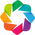

In [26]:
import pandas as pd
import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

# Nodes: your module types and PID types
nodes = [
    ("mono-Si", "module"),
    ("multi-Si", "module"),
    ("HIT", "module"),
    ("CIGS", "module"),
    ("PID-s", "pid"),
    ("PID-p", "pid"),
    ("PID-c", "pid")
]

# Give each node an ID and category
node_df = pd.DataFrame({
    "index": range(len(nodes)),
    "label": [n[0] for n in nodes],
    "group": [n[1] for n in nodes]
})

# Chord connections: from module → PID
links = pd.DataFrame({
    "source": ["mono-c-Si", "mono-c-Si", "mono-c-Si",
               "multi-c-Si", "multi-c-Si", "multi-c-Si",
               "HIT", "HIT", "HIT",
               "CIGS", "CIGS", "CIGS"],
    "target": ["PID-s", "PID-p", "PID-c",
               "PID-s", "PID-p", "PID-c",
               "PID-s", "PID-p", "PID-c",
               "PID-s", "PID-p", "PID-c"],
    "value":  [28, 28, 20, 
               15, 2, 7, 
               4, 0, 4, 
               2, 0, 0]
})


In [27]:

# Map labels to index
label_to_index = dict(zip(node_df["label"], node_df["index"]))
links["source"] = links["source"].map(label_to_index)
links["target"] = links["target"].map(label_to_index)

# === 3. Define color map by label ===
label_colors = {
    "mono-c-Si": "#989afb",
    "multi-c-Si": "#e9a8ff",
    "HIT": "#f096b2",
    "CIGS": "#ffb37c",
    "PID-s": "#7fedad",
    "PID-p": "#4be3d1",
    "PID-c": "#90d171"
}

# === 4. Create and display the chord diagram ===
chord = hv.Chord((links, hv.Dataset(node_df, 'index')))

chord.opts(
    opts.Chord(
        edge_color="source",
        node_color="label",        # Use label for node color
        node_cmap=label_colors,    # Dictionary maps labels to colors
        labels="label",
        width=600,
        height=600,
        title="Module Technology ↔ PID Type"
    )
)



IndexError: index 7 is out of bounds for axis 0 with size 7

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
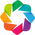

:Chord   [source,target]   (value)

In [2]:
import pandas as pd
import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

# === 1. Define nodes (labels + group type)
nodes = [
    ("positive (+)", "voltage bias"),
    ("negative (-)", "voltage bias"),
    ("both (+ and -)", "voltage bias"),
    ("none", "voltage bias"),
    ("PID-s", "pid"),
    ("PID-p", "pid"),
    ("PID-c", "pid")
]

# Create node DataFrame
node_df = pd.DataFrame({
    "index": range(len(nodes)),
    "label": [n[0] for n in nodes],
    "group": [n[1] for n in nodes]
})

# === 2. Define links
links = pd.DataFrame({
    "source": [
        "positive (+)", "positive (+)", "positive (+)",
        "negative (-)", "negative (-)", "negative (-)",
        "both (+ and -)", "both (+ and -)", "both (+ and -)",
        "none", "none", "none"
    ],
    "target": [
        "PID-s", "PID-p", "PID-c",
        "PID-s", "PID-p", "PID-c",
        "PID-s", "PID-p", "PID-c",
        "PID-s", "PID-p", "PID-c"
    ],
    "value":  [
        4, 8, 5,
        30, 16, 24,
        5, 6, 2,
        1, 0, 1
    ]
})

# Map labels to index
label_to_index = dict(zip(node_df["label"], node_df["index"]))
links["source"] = links["source"].map(label_to_index)
links["target"] = links["target"].map(label_to_index)

# === 3. Define color list (ordered by node index!)
colors = [
    "#3333D8",  # mono-c-Si
    "#C021EC",  # multi-c-Si
    "#DB1C5F",  # HIT
    "#FFB43B",  # CIGS
    "#16820E",  # PID-s
    "#16CCBD",  # PID-p
    "#2895E9"   # PID-c
]

# === 4. Create chord diagram
chord = hv.Chord((links, hv.Dataset(node_df, 'index')))

chord.opts(
    opts.Chord(
        edge_color="source",
        node_color="index",      # Now matching colors by index
        cmap=colors,             # Order matters: index 0–6
        node_size=10,            # Adjust node size
        labels="label",
        width=600,
        height=600,
        title="Voltage Bias ↔ PID Type"
    )
)
